In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
df = pd.read_csv('data.csv', header=None)

In [3]:
# df[df[3] == '?'].index.values
# df.shape
# df.drop(df[df[3] == '?'])
print (df.shape)

(690, 16)


In [4]:
for column in [0,1,3,4,5,6,13]:
#     print (column)
    df.drop(index=df[df[column] == '?'].index.values, inplace=True)
    
print (df.shape)

(653, 16)


In [5]:
df[:6]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [6]:
col_numberic = [1,2,7,10,13,14]
col_category = [0,3,4,5,6,8,9,11,12,15]
df[col_numberic] = df[col_numberic].astype(float)
df[col_category] = df[col_category].astype('category')
print (df.dtypes)

0     category
1      float64
2      float64
3     category
4     category
5     category
6     category
7      float64
8     category
9     category
10     float64
11    category
12    category
13     float64
14     float64
15    category
dtype: object


In [7]:
# Category features => one hot encoding vectors
train_df = pd.get_dummies(df)
train_df[:4]

,1,2,7,10,13,14,0_a,0_b,3_l,3_u,...,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,15_+,15_-
0,30.83,0.00,1.25,1.0,202.0,0.0,0,1,0,1,...,1,0,1,1,0,1,0,0,1,0
1,58.67,4.46,3.04,6.0,43.0,560.0,1,0,0,1,...,1,0,1,1,0,1,0,0,1,0
2,24.50,0.50,1.50,0.0,280.0,824.0,1,0,0,1,...,1,1,0,1,0,1,0,0,1,0
3,27.83,1.54,3.75,5.0,100.0,3.0,0,1,0,1,...,1,0,1,0,1,1,0,0,1,0


In [8]:
# Normalize data
ss = StandardScaler()
train_df[col_numberic] = ss.fit_transform(train_df[col_numberic])
train_df[:4]

,1,2,7,10,13,14,0_a,0_b,3_l,3_u,...,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,15_+,15_-
0,-0.056962,-0.961440,-0.295171,-0.302596,0.128682,-0.193125,0,1,0,1,...,1,0,1,1,0,1,0,0,1,0
1,2.296536,-0.073565,0.236217,0.704516,-0.816802,-0.086443,1,0,0,1,...,1,0,1,1,0,1,0,0,1,0
2,-0.592078,-0.861903,-0.220955,-0.504019,0.592504,-0.036150,1,0,0,1,...,1,1,0,1,0,1,0,0,1,0
3,-0.310572,-0.654865,0.446990,0.503093,-0.477855,-0.192553,0,1,0,1,...,1,0,1,0,1,1,0,0,1,0


In [9]:
all_names = list(train_df.columns.values)
name_col_x = all_names[:-2]
name_col_Y = all_names[-2]
print (name_col_x)
print (name_col_Y)

[1, 2, 7, 10, 13, 14, '0_a', '0_b', '3_l', '3_u', '3_y', '4_g', '4_gg', '4_p', '5_aa', '5_c', '5_cc', '5_d', '5_e', '5_ff', '5_i', '5_j', '5_k', '5_m', '5_q', '5_r', '5_w', '5_x', '6_bb', '6_dd', '6_ff', '6_h', '6_j', '6_n', '6_o', '6_v', '6_z', '8_f', '8_t', '9_f', '9_t', '11_f', '11_t', '12_g', '12_p', '12_s']
15_+


In [10]:
X_data = train_df[name_col_x].values
Y_data = train_df[name_col_Y].values

In [11]:
X_data = y = np.expand_dims(X_data, axis=-1)

In [12]:
X_data.shape

(653, 46, 1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.25, random_state=42)

In [14]:
X_train.shape

(489, 46, 1)

In [15]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# create model
filters = 250
kernel_size = 3

# model = Sequential()
# model.add(Conv1D(16, kernel_size, padding='valid', activation='relu', strides=1, input_shape=(46,1)))
# model.add(MaxPooling1D(pool_size=2))

# model.add(Conv1D(64, kernel_size, padding='valid', activation='relu', strides=1))
# model.add(MaxPooling1D(pool_size=2))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#-------------------------------------------------------------------------
# model = Sequential()
# model.add(Conv1D(16, kernel_size, padding='valid', activation='relu', strides=1, input_shape=(46,1)))
# model.add(MaxPooling1D(pool_size=2))

# model.add(Conv1D(64, kernel_size, padding='valid', activation='relu', strides=1))
# model.add(MaxPooling1D(pool_size=2))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#-------------------------------------------------------------------------
model = Sequential()
model.add(Conv1D(16, kernel_size, padding='valid', activation='relu', strides=1, input_shape=(46,1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(32, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/home/quang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 44, 16)            64        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 22, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 20, 32)            1568      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               41088     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [16]:
from keras.callbacks import LearningRateScheduler
import math
def step_decay(epoch, current_lr):
    print (epoch, current_lr)
#     initial_lrate = 0.1
#     drop = 0.5
#     epochs_drop = 10.0
#     lrate = initial_lrate * math.pow(drop,  
#            math.floor((1+epoch)/epochs_drop))
    if epoch < 17:
        return 0.01
    else:
        return 0.001
    return lrate

lrate = LearningRateScheduler(step_decay)
# history = model.fit(X_data, Y_data, epochs=20, batch_size=5, validation_split=0.25, shuffle=True)
history = model.fit(X_train, y_train, epochs=30, batch_size=3, validation_data=(X_test, y_test), callbacks=[lrate])

Train on 489 samples, validate on 164 samples
Epoch 1/30
0 0.0010000000474974513
489/489 [==============================] - 2s 4ms/step - loss: 0.6761 - acc: 0.6217 - val_loss: 0.5139 - val_acc: 0.7805
Epoch 2/30
1 0.009999999776482582
489/489 [==============================] - 0s 993us/step - loss: 0.5309 - acc: 0.7771 - val_loss: 0.4658 - val_acc: 0.7866
Epoch 3/30
2 0.009999999776482582
489/489 [==============================] - 0s 984us/step - loss: 0.4976 - acc: 0.7894 - val_loss: 0.4211 - val_acc: 0.7927
Epoch 4/30
3 0.009999999776482582
489/489 [==============================] - 0s 996us/step - loss: 0.4761 - acc: 0.8098 - val_loss: 0.4132 - val_acc: 0.8171
Epoch 5/30
4 0.009999999776482582
489/489 [==============================] - 0s 1ms/step - loss: 0.5335 - acc: 0.8160 - val_loss: 0.3900 - val_acc: 0.8415
Epoch 6/30
5 0.009999999776482582
489/489 [==============================] - 0s 995us/step - loss: 0.4458 - acc: 0.8364 - val_loss: 0.4035 - val_acc: 0.8598
Epoch 7/30
6 0.

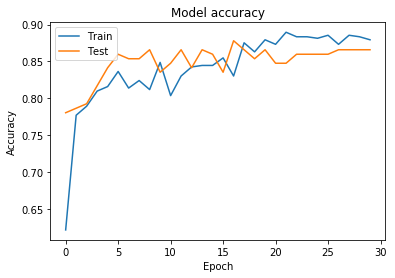

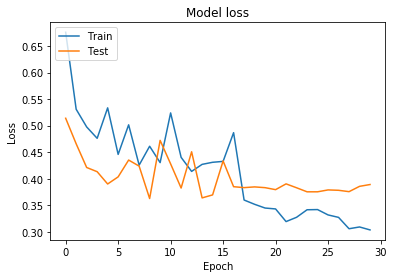

In [17]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
# y_pred = model.evaluate(X_test, y_test)
y_pred = model.predict_classes(X_test)

In [19]:
y_pred[:3]

array([[0],
       [0],
       [1]], dtype=int32)

In [20]:
# scores = cross_validate(clf, X_data, Y_data, cv=10, scoring=['accuracy', 'precision', 'recall'],
#                        return_train_score=False)
# print (scores.keys())
# print (scores['test_accuracy'])

precision_recall_fscore_support(y_test, y_pred)
# clf.score(X_test, y_test)
report_lr = precision_recall_fscore_support(y_test, y_pred, average='binary')
print ("\nprecision = %0.2f, recall = %0.2f, F1 = %0.2f, accuracy = %0.2f\n" % \
           (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_test, y_pred)))


precision = 0.86, recall = 0.81, F1 = 0.84, accuracy = 0.87



In [21]:
# print ("precision = %0.2f, recall = %0.2f, accuracy = %0.2f" % \
#            (scores['test_precision'].mean(), scores['test_recall'].mean(), scores['test_accuracy'].mean()))